# 13_Pipes

This note continues your NestJS series after **Route Parameters** and **Query Strings**, and introduces **Pipes**.

---

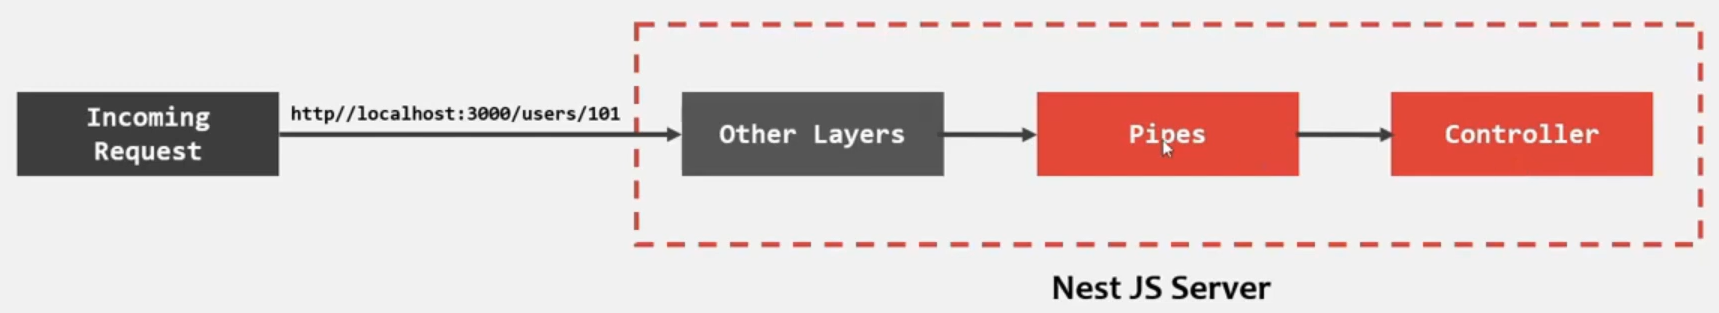


## 1. What Are Pipes in NestJS?

**Definition:**

* In NestJS, **pipes are functions (classes)** that **transform or validate** incoming data **before it reaches the controller method**.
* A pipe runs **after the request arrives**, but **before the controller handler** is executed.

You can think of a pipe as a **gatekeeper for your data**:

* Request comes in → passes through pipes (validation / transformation) → then reaches the controller.

### 1.1 Where Does the Data Come From?

In previous parts, we learned that we can send data to the server via:

* **Route parameters** – e.g. `/users/101`
* **Query strings** – e.g. `/users?gender=male&page=3`
* **Request body** – e.g. `POST /users` with JSON data

**Pipes can act on all of these** to:

* Validate the data
* Transform the data
* Sanitize the data

The goal is: when the data finally reaches the **controller method**, it is already in a **clean and expected format**.

---

## 2. Why Do We Use Pipes?

### 2.1 Data Validation

Pipes can **validate incoming data** against some rules, for example:

* Check that an ID is a **number**.
* Ensure a string is within a certain **length**.
* Ensure data follows a **specific format** (like an email or date string).

Benefits:

* Prevents invalid data from reaching your business logic.
* Reduces runtime errors.
* Improves overall **data quality**.

### 2.2 Data Transformation

Pipes can **transform data** into a format that is easier for the controller to work with.

Examples:

* Convert a route parameter `'101'` (string) into `101` (number).
* Convert query string values (which are always strings) into numbers, booleans, or dates.
* Parse JSON strings into objects.

### 2.3 Data Sanitization

Pipes can also **sanitize** data to remove potentially harmful content, such as:

* HTML tags
* Malicious scripts (e.g. `<script>` tags)

This helps protect your application from security issues like **XSS (Cross-Site Scripting)**.

> ✅ Summary: Pipes help you **validate**, **transform**, and **sanitize** request data before it reaches your controllers.

---

## 3. How Pipes Fit in the Request Lifecycle

Conceptual flow:

1. **Incoming request** arrives (e.g. `GET /users/101`).
2. NestJS routes it to the correct **controller + method**.
3. Before the controller method is called, any **pipes attached** to the parameters or route are executed.
4. Pipes can:

   * **Transform** the data (e.g. string → number).
   * **Validate** the data and throw an error if it’s invalid.
5. If validation passes, the **controller method** executes with the processed data.

If a pipe finds invalid data:

* It can **throw an exception**.
* NestJS sends a **response back to the client** (e.g. `400 Bad Request`) **without calling the controller**.

---

## 4. Example 1 – Transforming a Route Parameter

### 4.1 Request Example

```txt
GET /users/101
```

* `101` is a **route parameter** (`:id`).
* Route parameters are read as **strings** by default.
* But maybe your controller expects `id` as a **number**.

### 4.2 Without a Pipe

```ts
@Get('users/:id')
getUserById(@Param('id') id: string) {
  // id is a string here
  const numericId = +id; // manual conversion
  return this.userService.getUserById(numericId);
}
```

Here you have to **manually convert** `id` from string to number in the controller.

### 4.3 With a Pipe (Conceptual)

Instead, a pipe can:

* Take `id` as `'101'` (string).
* Convert it to `101` (number).
* Pass the **number** to the controller.

So in the controller, you can simply expect the right type and avoid manual conversion logic.

If the client sends:

```txt
GET /users/abc
```

* The pipe will **try to convert `'abc'` to a number**.
* Fails to convert → pipe **throws an exception**.
* NestJS responds with e.g. **400 Bad Request**.
* The controller method is **never executed**.

This is a typical example of **data transformation + validation** in a pipe.

---

## 5. Example 2 – Query Strings & Pagination with Pipes

Consider a URL for fetching users with pagination:

```txt
GET /users?limit=30&page=3
```

* `limit` = number of users per page (e.g. 30).
* `page` = which page to fetch (e.g. 3).

### 5.1 Raw Behavior Without Pipes

* Query string values are always **strings**:

  * `limit` is `'30'` (string)
  * `page` is `'3'` (string)
* You would need to manually convert them to numbers in your controller.

If the URL is:

```txt
GET /users
```

* No `limit` or `page` query strings are present.
* You might want to use some **default values**, like:

  * `limit = 10`
  * `page = 1`

### 5.2 How Pipes Can Help Here

We might have **two pipes** conceptually:

1. **Type conversion pipe**

   * Converts `'30'` → `30` (number).
   * Converts `'3'` → `3` (number).

2. **Default-setting pipe**

   * If `limit` or `page` is missing, it sets default values.
   * Example: if no query strings:

     * `limit = 10`
     * `page = 1`

So the controller always receives a clean object like:

```ts
{
  limit: 30,
  page: 3,
}
```

or, if none were passed:

```ts
{
  limit: 10,
  page: 1,
}
```

This keeps the **controller logic simple and clean**, because:

* No need to worry about missing values.
* No need to handle type conversions yourself.

---

## 6. Built-in Pipes vs Custom Pipes

NestJS provides **built-in pipes** and also lets you create **custom pipes**.

### 6.1 Built-in Pipes (from Docs)

From the official documentation, some important built-in pipes are:

* `ValidationPipe`
* `ParseIntPipe`
* `ParseFloatPipe`
* `ParseBoolPipe`
* `ParseArrayPipe`
* And others

> In the next lectures/notes, you will:
>
> * Use these **built-in pipes** in real examples.
> * Then learn how to **create your own custom pipe**.

### 6.2 Concept of a Custom Pipe (High Level)

From the NestJS docs:

* A pipe is a **TypeScript class**:

  * Decorated with `@Injectable()`.
  * Implements the `PipeTransform` interface.

You’ll see the structure when we actually implement a pipe, but at a high level:

```ts
@Injectable()
export class ExamplePipe implements PipeTransform {
  transform(value: any) {
    // validate or transform value here
    return value; // or throw an exception if invalid
  }
}
```

---

## 7. Summary – Pipes (Introduction)

* **Pipes** run **before** the controller method in NestJS.
* They are used to **validate**, **transform**, and **sanitize** incoming data.
* They act on data from **route params**, **query strings**, and **request bodies**.
* If data is invalid, a pipe can **throw an exception** and **prevent the controller from running**.
* Common use cases:

  * Converting strings (e.g. `'101'`) to numbers.
  * Enforcing required formats.
  * Applying default values (like pagination).
* NestJS has several **built-in pipes**, and you can also create **custom pipes**.

This note is the **introductory part of Pipes** in your NestJS note series. In the next part, you can document **how to use specific built-in pipes (like `ParseIntPipe` and `ValidationPipe`) and how to write a custom pipe.**
